# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# Reading dataset

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df=df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data Analysis

In [4]:
df.shape

(150, 5)

In [5]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.isnull()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [9]:
df['Species'].value_counts().to_frame()

,Species
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [10]:
avg_septal_length = df["SepalLengthCm"].astype("float").mean(axis=0)
print("Average of SepalLengthCm:", avg_septal_length)

avg_septal_length = df["SepalWidthCm"].astype("float").mean(axis=0)
print("Average of SepalWidthCm:", avg_septal_length)

avg_septal_length = df["PetalLengthCm"].astype("float").mean(axis=0)
print("Average of PetalLengthCm:", avg_septal_length)

avg_septal_length = df["PetalWidthCm"].astype("float").mean(axis=0)
print("Average of PetalWidthCm:", avg_septal_length)


Average of SepalLengthCm: 5.843333333333335
Average of SepalWidthCm: 3.0540000000000007
Average of PetalLengthCm: 3.7586666666666693
Average of PetalWidthCm: 1.1986666666666672


In [11]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
df_group_one = df[['Species','SepalLengthCm']]
df_group_one = df_group_one.groupby(['Species'],as_index=False).mean()
df_group_one

,Species,SepalLengthCm
0,Iris-setosa,5.006
1,Iris-versicolor,5.936
2,Iris-virginica,6.588


# Data Visualization

In [13]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

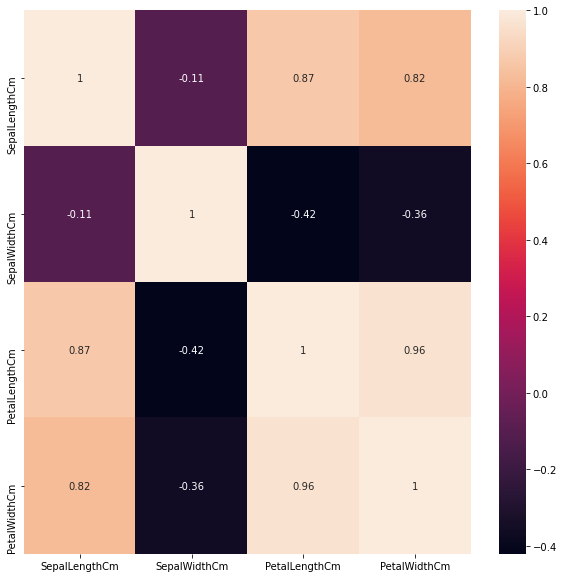

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

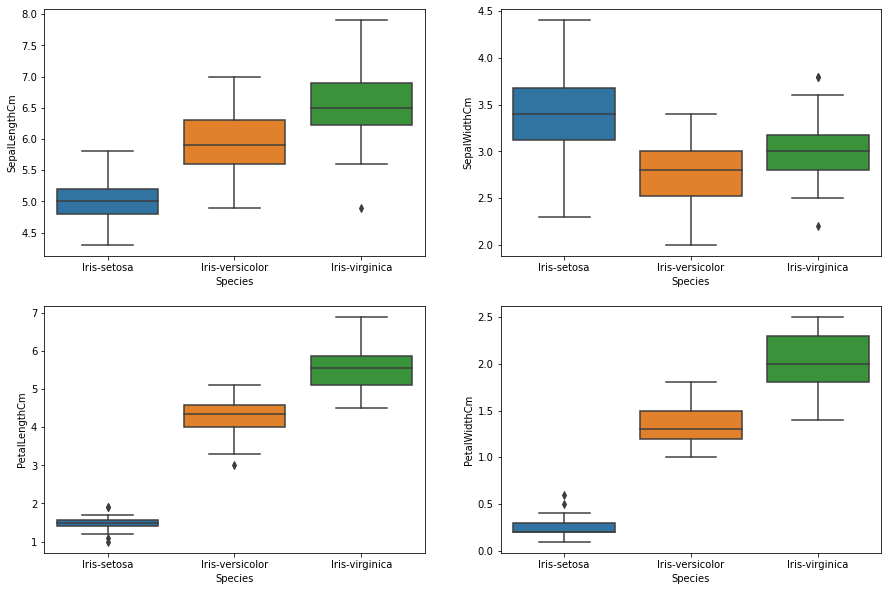

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species', y = 'SepalLengthCm', data=df)
plt.subplot(2,2,2)
sns.boxplot(x='Species', y = 'SepalWidthCm', data=df)

plt.subplot(2,2,3)
sns.boxplot(x='Species', y = 'PetalLengthCm', data=df)
plt.subplot(2,2,4)
sns.boxplot(x='Species', y = 'PetalWidthCm', data=df)
plt.show()

# Pre-processing: Feature selection/extraction

In [16]:
Feature = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']]
Feature.drop(['Species'], axis = 1,inplace=True)
Feature.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
x=Feature
x[0:5]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
y = df['Species'].values
y[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

# Normalize Data

In [19]:
x= preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]


array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

# Classification

### In machine learning classification is a supervised learning approach which can be thought of as a means of categorizing or classifying some unknown items into a discrete set of classes.

# K Nearest Neighbor(KNN)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
print('Train set:',x_train.shape,y_train.shape)
print('Test set:',x_test.shape,y_test.shape)

Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
k=7
neigh=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
print(neigh)

KNeighborsClassifier(n_neighbors=7)


In [24]:
yhat=neigh.predict(x_test)
yhat[0:5]

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [25]:
from sklearn import metrics
print("Test set accuracy:",metrics.accuracy_score(y_test,yhat))

Test set accuracy: 0.9333333333333333


In [26]:
Ks = 10
mean_acc = np.zeros((Ks-1))#The numpy.zeros() function returns a new array of given shape and type, with zeros.
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.9       , 0.93333333, 0.9       , 0.93333333, 0.93333333,
       0.93333333, 0.93333333, 0.93333333, 0.93333333])

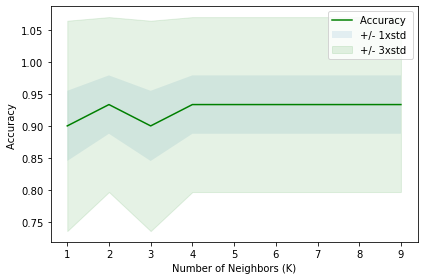

In [27]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [28]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9333333333333333 with k= 2


# Decision Tree

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
print('Train set:',x_train.shape,y_train.shape)
print('Test set:',x_test.shape,y_test.shape)

Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
speciesTree=DecisionTreeClassifier(criterion="entropy",max_depth=4).fit(x_train,y_train)
print(speciesTree)

DecisionTreeClassifier(criterion='entropy', max_depth=4)


In [33]:
yhat=speciesTree.predict(x_test)
yhat[0:5]

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [34]:
from sklearn import metrics
print("Test set accuracy:",metrics.accuracy_score(y_test,yhat))

Test set accuracy: 0.9666666666666667


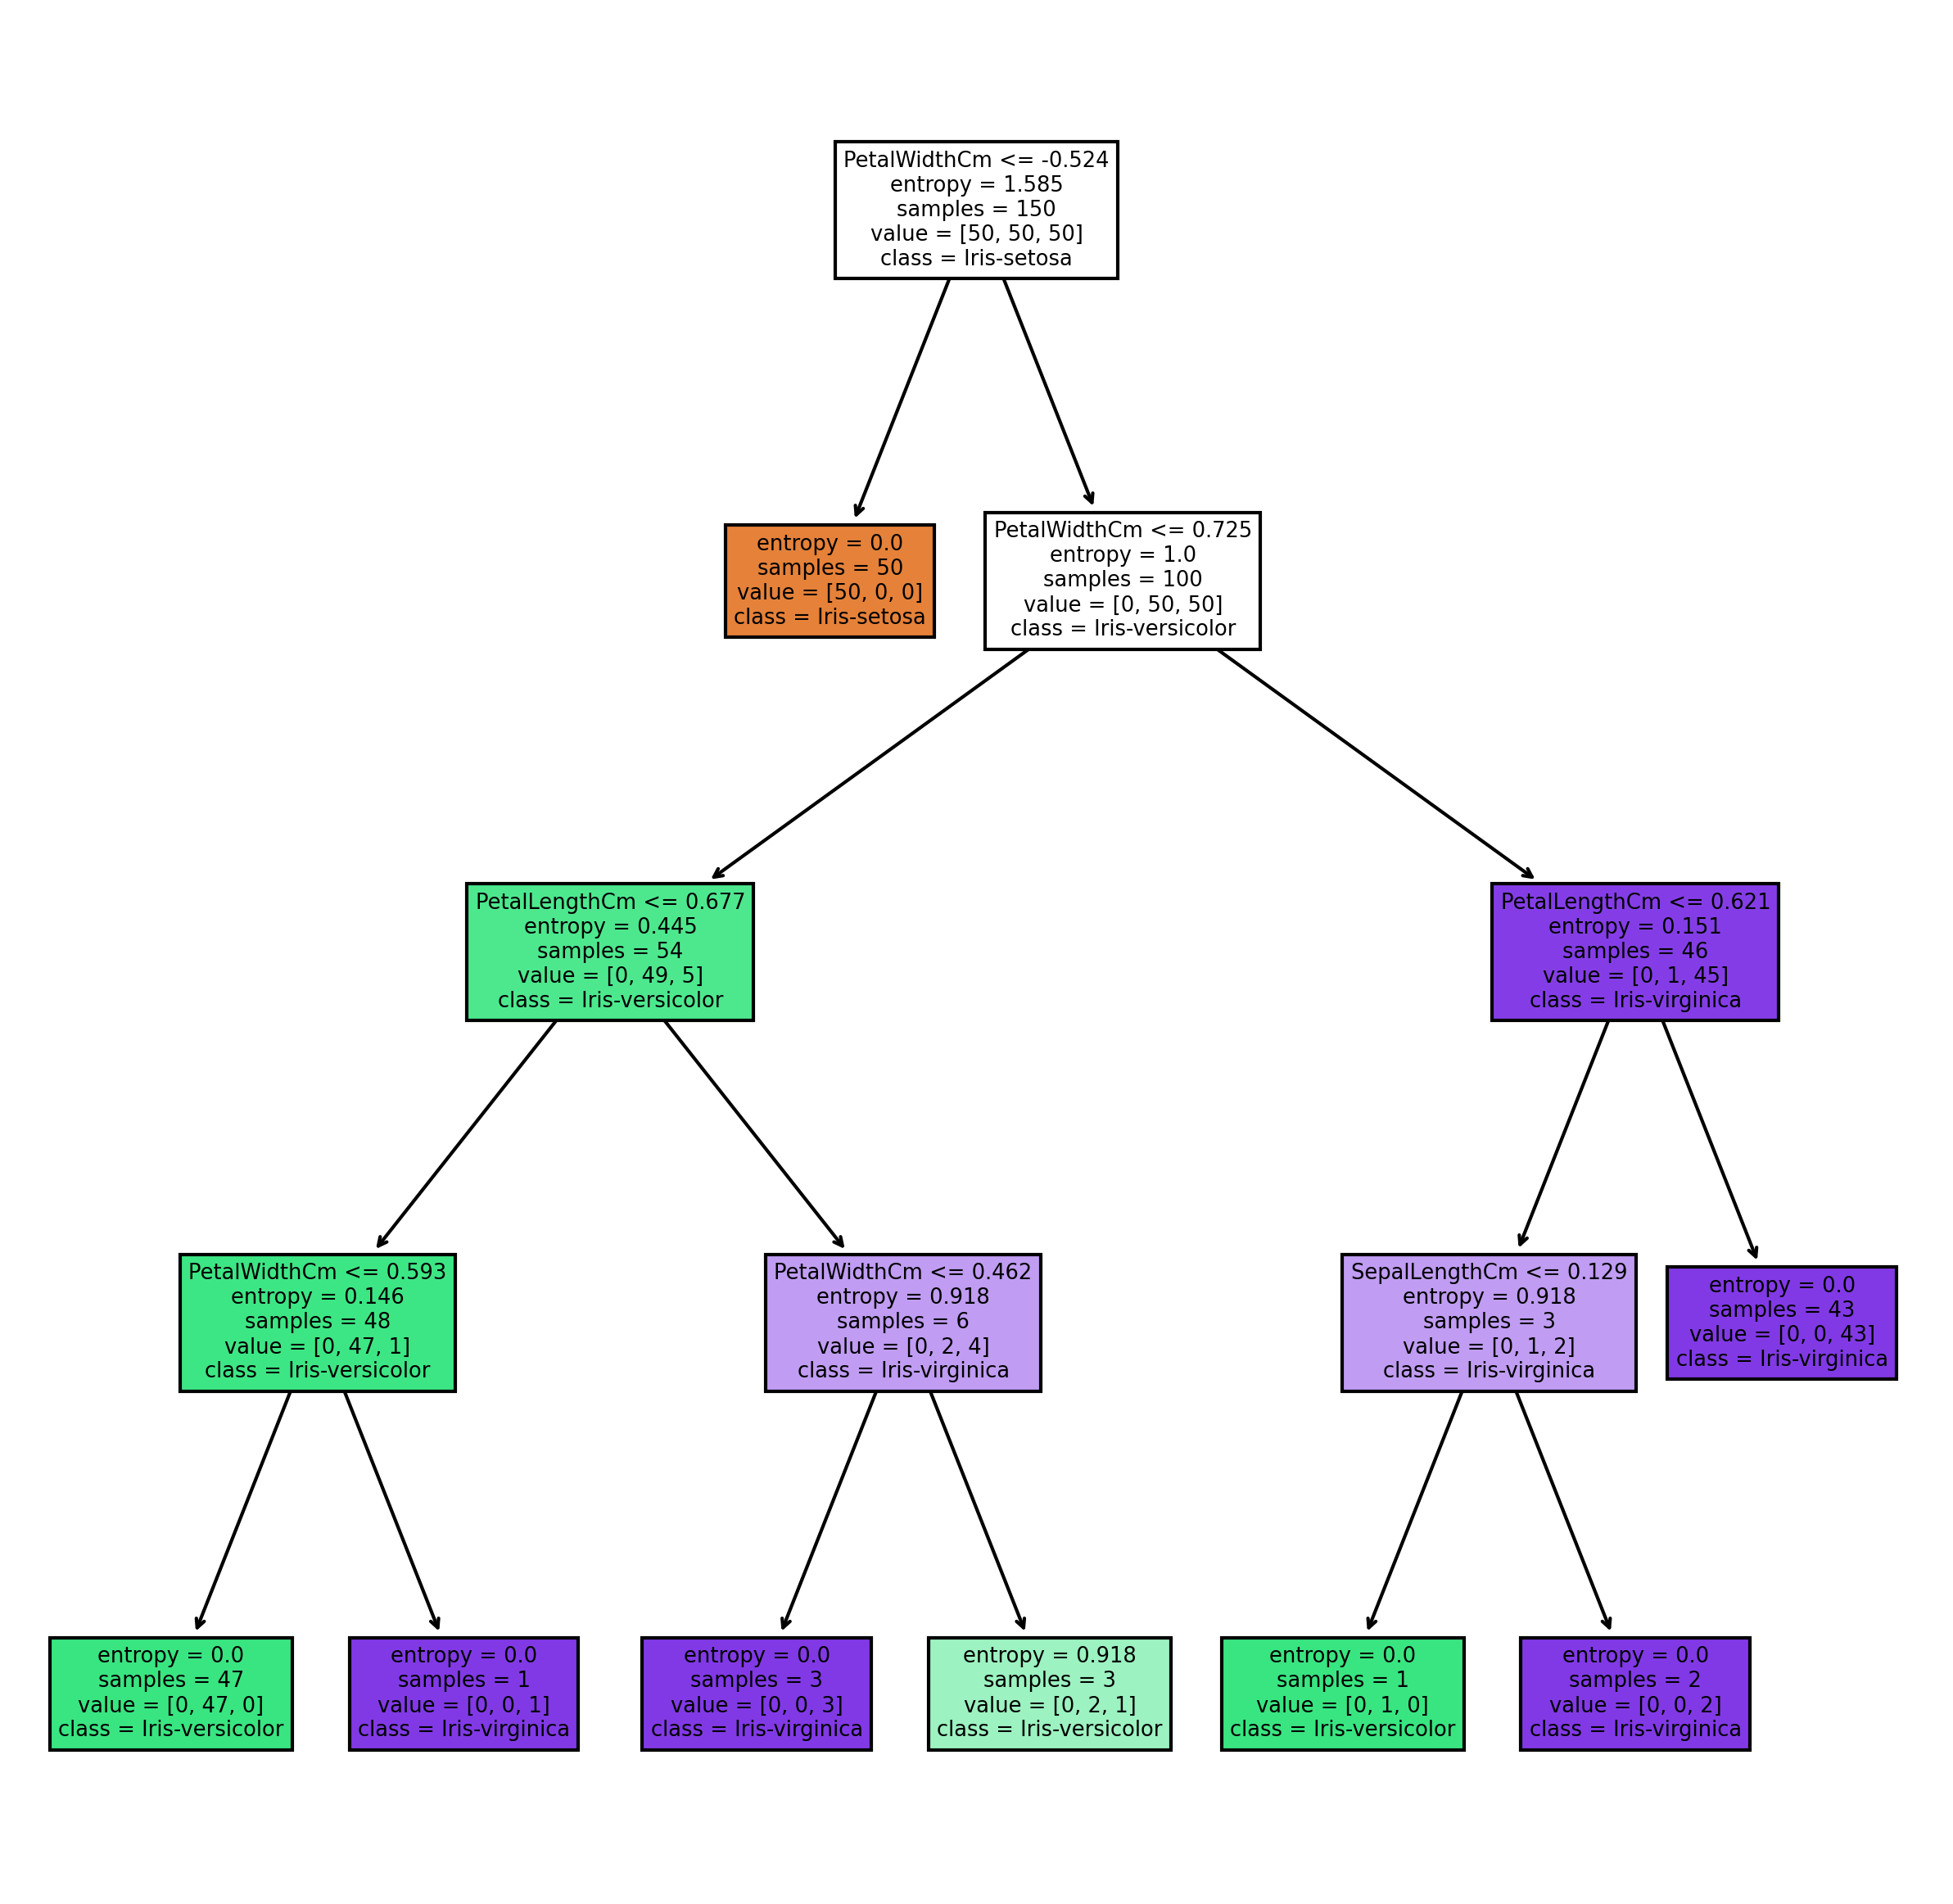

In [35]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
fn = df.columns[0:4]
cn = df["Species"].unique().tolist()
speciesTree.fit(x,y)
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,10),dpi=300)
tree.plot_tree(speciesTree,feature_names=fn,class_names=cn,filled=True)
plt.show()

# Convert Categorical features to numerical values

In [36]:
le=LabelEncoder()
df["Species"]=le.fit_transform(df["Species"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


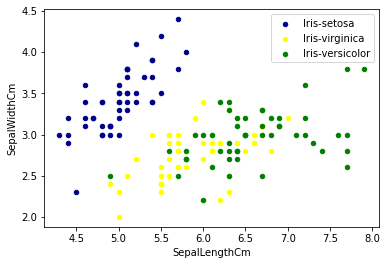

In [37]:
ax =df[df['Species']==0][0:50].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='DarkBlue', label='Iris-setosa');
ax1=df[df['Species']==1][0:50].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='Yellow', label='Iris-virginica', ax=ax);
ax2=df[df['Species']==2][0:50].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='Green', label='Iris-versicolor', ax=ax1);
plt.show()

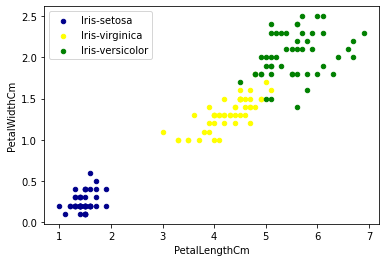

In [38]:
ax =df[df['Species']==0][0:50].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='DarkBlue', label='Iris-setosa');
ax1=df[df['Species']==1][0:50].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='Yellow', label='Iris-virginica', ax=ax);
ax2=df[df['Species']==2][0:50].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='Green', label='Iris-versicolor', ax=ax1);
plt.show()

# Support Vector Machine

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
print('Train set:',x_train.shape,y_train.shape)
print('Test set:',x_test.shape,y_test.shape)

Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


In [41]:
from sklearn import svm

In [42]:
clf=svm.SVC(kernel='rbf').fit(x_train,y_train)

In [43]:
yhat=clf.predict(x_test)
yhat[0:5]

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [44]:
from sklearn import metrics
print("Test set accuracy:",metrics.accuracy_score(y_test,yhat))

Test set accuracy: 0.9333333333333333


# Logistic Regression

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
print('Train set:',x_train.shape,y_train.shape)
print('Test set:',x_test.shape,y_test.shape)

Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
LR = LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(x_train,y_train)
LR

LogisticRegression(multi_class='multinomial')

In [49]:
yhat = LR.predict(x_test)
yhat

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [50]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob

array([[5.36003871e-05, 4.65231382e-02, 9.53423261e-01],
       [9.66889983e-01, 3.31097109e-02, 3.05680721e-07],
       [9.02938499e-06, 6.33196365e-02, 9.36671334e-01],
       [1.94112798e-06, 1.71207986e-02, 9.82877260e-01],
       [1.91419865e-05, 7.93302026e-02, 9.20650655e-01],
       [1.26628296e-02, 7.71291879e-01, 2.16045292e-01],
       [1.87036647e-03, 4.33414965e-01, 5.64714669e-01],
       [9.88351239e-01, 1.16487347e-02, 2.62921107e-08],
       [9.85533830e-01, 1.44659737e-02, 1.95794707e-07],
       [2.30649769e-03, 5.82572226e-01, 4.15121277e-01],
       [8.65329698e-01, 1.34668414e-01, 1.88809562e-06],
       [9.77378703e-01, 2.26210858e-02, 2.11040947e-07],
       [9.24732882e-01, 7.52665926e-02, 5.24921620e-07],
       [1.03493797e-02, 7.99987569e-01, 1.89663051e-01],
       [2.59881444e-04, 1.03718142e-01, 8.96021977e-01],
       [9.32097265e-01, 6.79022527e-02, 4.82202966e-07],
       [1.31816030e-02, 9.64577615e-01, 2.22407821e-02],
       [9.68629071e-01, 3.13706

In [51]:
from sklearn import metrics
print("Test set accuracy:",metrics.accuracy_score(y_test,yhat))

Test set accuracy: 0.9333333333333333
